# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('gdrive')
%cd /content/gdrive/'My Drive'/Dataset

Mounted at gdrive
/content/gdrive/My Drive/Dataset


# Imports

In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load dataset

In [ ]:
test = sio.loadmat('dataset_1.mat')
test.keys()

dict_keys(['__header__', '__version__', '__globals__', 'labels', 'samples'])

In [ ]:
print(type(test))
for i in test:
  print(i)
header = test['__header__']
data = test['samples']
labels = test['labels']
print(header)
print(data.ndim)
print(data.shape)
print(labels.ndim)
print(labels.shape)
# for i in var2:
#   print(i)

<class 'dict'>
__header__
__version__
__globals__
labels
samples
b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Sep 10 19:16:26 2020'
3
(50000, 28, 28)
2
(1, 50000)


# a) Visualizing 10 samples from each class of dataset1

In [ ]:
def plot_image(X, temp):
  fig, axes = plt.subplots(2,5, figsize=(7,7))
  for i,ax in enumerate(axes.flat):
    ax.imshow(X[i])
  plt.savefig("abc" + str(temp) + ".png")
  temp += 1

## Selecting 10 sample of each digit

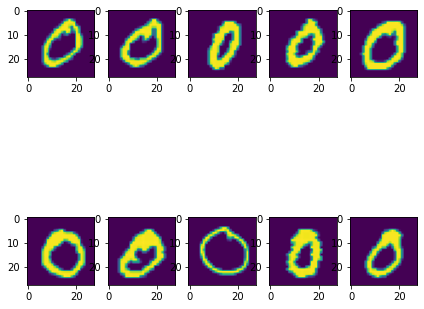

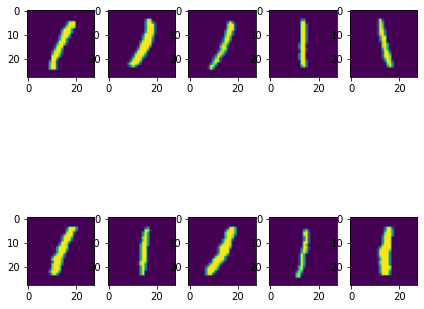

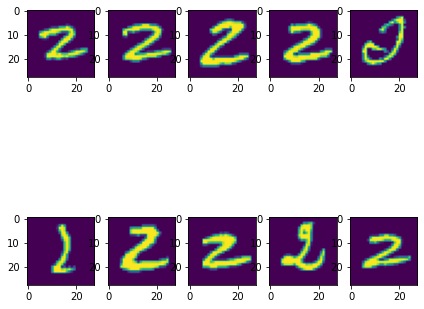

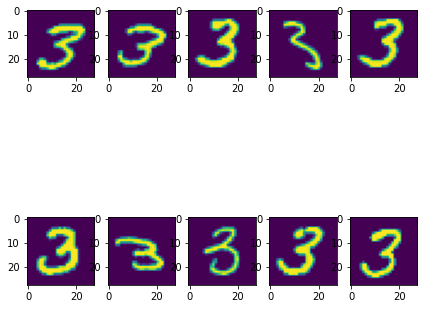

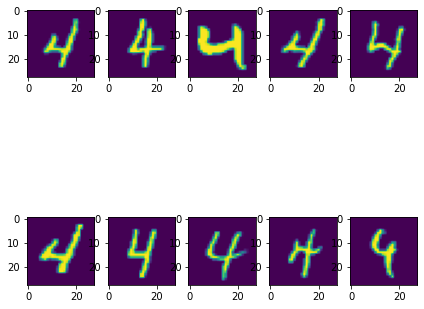

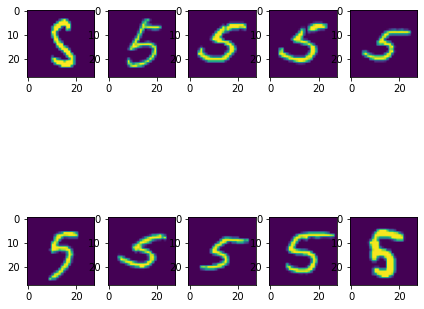

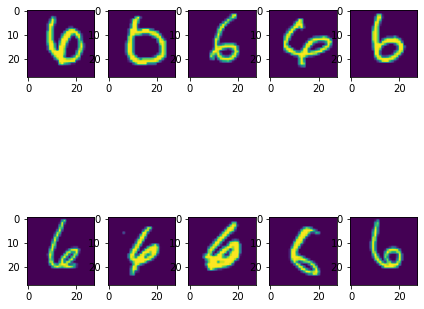

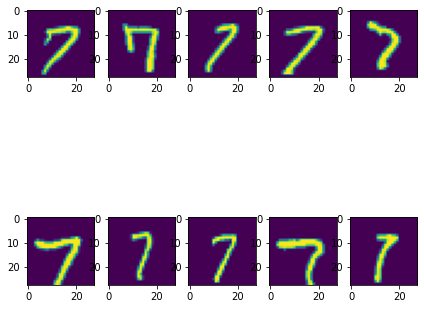

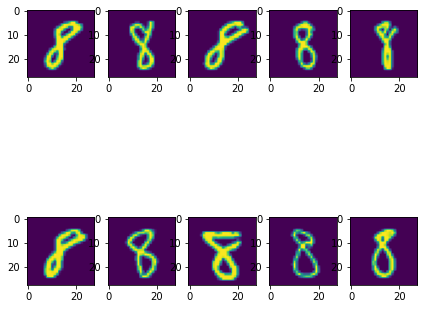

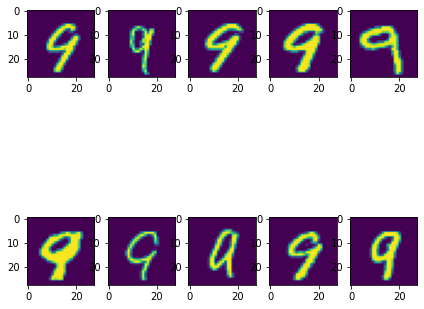

In [ ]:
digit = 0
temp = 0
index = []
X = []
count = 0
for i in range(1000):
  if labels[0][i] == digit:
    X.append(data[i])
    count+=1
  if(count == 10):
    count = 0
    temp += 1
    plot_image(X, temp)
    X = []
    digit += 1

  if(digit == 10):
    break


In [ ]:
%ls

abc10.png  abc3.png  abc6.png  abc9.png       PRSA_data_2010.1.1-2014.12.31.csv
abc1.png   abc4.png  abc7.png  dataset_1.mat
abc2.png   abc5.png  abc8.png  dataset_2.mat


# b) Visualize the scatter plot of dataset2

In [ ]:
%cd /content/gdrive/'My Drive'/Dataset
%ls

/content/gdrive/My Drive/Dataset
abc10.png  abc3.png  abc6.png  abc9.png       PRSA_data_2010.1.1-2014.12.31.csv
abc1.png   abc4.png  abc7.png  dataset_1.mat
abc2.png   abc5.png  abc8.png  dataset_2.mat


In [ ]:
test1 = sio.loadmat('dataset_2.mat')
test1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'samples', 'labels'])

In [ ]:
# print(type(test1))
# for i in test1:
#   print(i)
# header1 = test1['__header__']
data1 = test1['samples']
labels1 = test1['labels']
# print(header1)
print(data1.ndim)
print(data1.shape)
print(labels1.ndim)
print(labels1.T.shape)
print(labels1[0].T)
setlist = set(labels1[0])
print(setlist)

2
(20000, 2)
2
(20000, 1)
[0 3 2 ... 3 3 3]
{0, 1, 2, 3}


In [ ]:
#data2 = np.hsplit(data1,2)
xaxis = []
yaxis = []
for x in data1:
  xaxis.append(x[0])
  yaxis.append(x[1])
print(len(xaxis))

20000


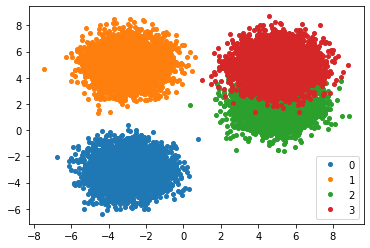

In [ ]:
# plt.scatter(data2[0], data2[1])
# plt.show()
df = pd.DataFrame(dict(x=xaxis, y=yaxis, label=labels1[0]))
groups = df.groupby('label')
#print(df)
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=4, label=name)
ax.legend()

plt.show()

# c) Reduce dataset1 to 2D and visualize scatter plot

In [ ]:
print(type(test))
for i in test:
  print(i)
header = test['__header__']
data = test['samples']
labels = test['labels']
print(header)
print(data.ndim)
print(data.shape)
print(labels.ndim)
print(labels.shape)
# for i in var2:
#   print(i)

<class 'dict'>
__header__
__version__
__globals__
labels
samples
b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Sep 10 19:16:26 2020'
3
(50000, 28, 28)
2
(1, 50000)


In [ ]:
data_2d = data.reshape(50000, 28*28)
print(data_2d)
df = data_2d[0:50000,:]
standardized_data = StandardScaler().fit_transform(df)
standardized_data.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(50000, 784)

In [ ]:
labels_1000 = labels[0][0:50000]
print(labels_1000.shape)
# labels_1000 = np.rot90(labels_1000)
# print(labels_1000.shape)
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(standardized_data)

(50000,)


In [ ]:
# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
print(tsne_data)

[[-28.62723923 -11.31901646   5.        ]
 [-36.82961273 -31.66965294   0.        ]
 [ 39.60116959  43.93177795   4.        ]
 ...
 [-14.13201809   7.39512491   8.        ]
 [ 28.86852837  11.7521944    4.        ]
 [ -4.95560837  11.15841484   8.        ]]


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


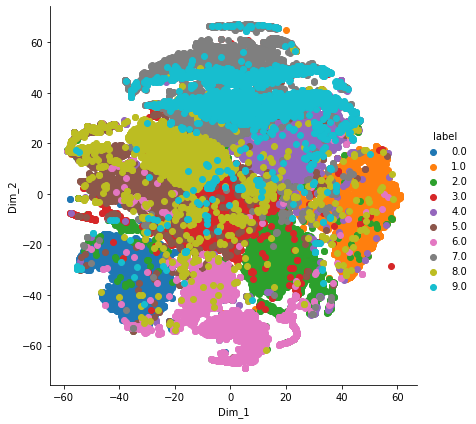

In [ ]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# d) Scatter plot of 3d data of dataset1

In [ ]:
print(type(test))
for i in test:
  print(i)
header = test['__header__']
data = test['samples']
labels = test['labels']
print(header)
print(data.ndim)
print(data.shape)
print(labels.ndim)
print(labels.shape)
# for i in var2:
#   print(i)

<class 'dict'>
__header__
__version__
__globals__
labels
samples
b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Sep 10 19:16:26 2020'
3
(50000, 28, 28)
2
(1, 50000)


In [ ]:
x_subset = test['samples']
y_subset = test['labels']
y_subset = y_subset.reshape(50000,)
x_subset = x_subset.reshape(50000,784)
# x_subset = x_subset[:500]
# y_subset = y_subset[:500]
# print(x_subset)
# print(y_subset)
# print(len(x_subset))
# print(len(y_subset))

In [ ]:
tsneDatasetOne = TSNE(n_components = 3).fit_transform(x_subset)

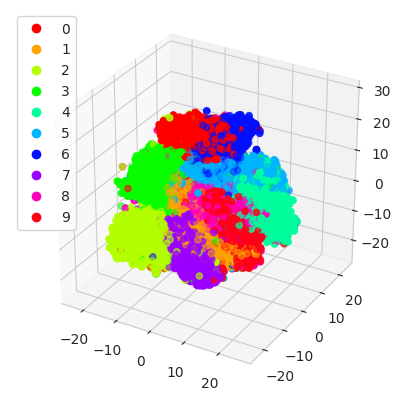

In [ ]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100
img1 = fig.add_subplot(1, 1, 1, projection='3d')
ax0 = img1.scatter(tsneDatasetOne[:,0],tsneDatasetOne[:,1],tsneDatasetOne[:,2] ,c = y_subset,cmap='hsv')
# cbar = plt.colorbar()
classes = ['0', '1', '2','3', '4', '5','6', '7', '8', '9']
plt.legend(loc='upper left',handles=ax0.legend_elements()[0], labels=classes)
plt.show()